<a href="https://colab.research.google.com/github/karabomaboka/60DaysDailyCoding_Challenge/blob/master/Coronavirus_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 03-02-2020.csv to 03-02-2020 (1).csv
User uploaded file "03-02-2020.csv" with length 8670 bytes


In [0]:
data=pd.read_csv('03-02-2020.csv')

In [0]:
data.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')

In [0]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-02T15:03:23,67103,2803,33934,30.9756,112.2707
1,NaN,South Korea,2020-03-02T20:23:16,4335,28,30,36.0000,128.0000
2,NaN,Italy,2020-03-02T20:23:16,2036,52,149,43.0000,12.0000
3,NaN,Iran,2020-03-02T20:23:16,1501,66,291,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-02T15:03:23,1350,7,1059,23.3417,113.4244


In [0]:
data.shape

(141, 8)

In [0]:
data.dtypes

Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
Latitude          float64
Longitude         float64
dtype: object

In [0]:
data.isnull().sum()

Province/State    67
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Latitude           0
Longitude          0
dtype: int64

In [0]:
data.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,640.489362,21.879433,323.418440,31.822450,29.574230
std,5657.626507,236.012696,2859.175129,20.480052,87.769878
min,0.000000,0.000000,0.000000,-41.454500,-123.869500
25%,1.000000,0.000000,0.000000,26.078900,-19.020800
50%,6.000000,0.000000,1.000000,35.745200,35.862300
75%,91.000000,1.000000,30.000000,43.073100,112.270700
max,67103.000000,2803.000000,33934.000000,64.963100,174.886000


In [0]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-02T15:03:23,67103,2803,33934,30.9756,112.2707
1,NaN,South Korea,2020-03-02T20:23:16,4335,28,30,36.0000,128.0000
2,NaN,Italy,2020-03-02T20:23:16,2036,52,149,43.0000,12.0000
3,NaN,Iran,2020-03-02T20:23:16,1501,66,291,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-02T15:03:23,1350,7,1059,23.3417,113.4244


In [0]:
data.groupby('Last Update')['Confirmed',	'Deaths','Recovered'].sum()

,Confirmed,Deaths,Recovered
Last Update,,,
2020-02-01T19:53:03,2,0,0
2020-02-03T03:53:02,2,0,0
2020-02-05T21:53:02,1,0,0
2020-02-08T03:43:03,1,0,1
2020-02-12T06:43:02,1,0,1
...,...,...,...
2020-03-02T21:23:04,21,0,2
2020-03-02T22:33:09,54,0,3
2020-03-02T22:43:02,2,0,0


In [0]:
data.groupby('Last Update')['Confirmed','Deaths','Recovered'].max()

,Confirmed,Deaths,Recovered
Last Update,,,
2020-02-01T19:53:03,1,0,0
2020-02-03T03:53:02,2,0,0
2020-02-05T21:53:02,1,0,0
2020-02-08T03:43:03,1,0,1
2020-02-12T06:43:02,1,0,1
...,...,...,...
2020-03-02T21:23:04,18,0,2
2020-03-02T22:33:09,42,0,3
2020-03-02T22:43:02,2,0,0


In [0]:
data_per_day=data.groupby('Last Update')['Confirmed',	'Deaths','Recovered'].sum()

In [0]:
data_per_day.head()

,Confirmed,Deaths,Recovered
Last Update,,,
2020-02-01T19:53:03,2,0,0
2020-02-03T03:53:02,2,0,0
2020-02-05T21:53:02,1,0,0
2020-02-08T03:43:03,1,0,1
2020-02-12T06:43:02,1,0,1


In [0]:
data_per_day.describe()

,Confirmed,Deaths,Recovered
count,72.000000,72.000000,72.000000
mean,1254.291667,42.847222,633.361111
std,8300.300472,332.630940,4303.311196
min,1.000000,0.000000,0.000000
25%,1.750000,0.000000,0.000000
50%,6.500000,0.000000,1.000000
75%,120.500000,1.000000,40.500000
max,70165.000000,2822.000000,36464.000000


In [0]:
data_per_day['Confirmed'].max()

70165

In [0]:
data_per_day['Confirmed'].min()

1

In [0]:
data_per_day['Confirmed'].idxmax()

'2020-03-02T15:03:23'

In [0]:
data_per_day['Confirmed'].idxmin()

'2020-02-05T21:53:02'

In [0]:
data.groupby(['Country/Region'])['Confirmed',	'Deaths','Recovered'].max()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,1,0,0
Algeria,3,0,0
Andorra,1,0,0
Armenia,1,0,0
Australia,9,1,4
...,...,...,...
Thailand,43,1,31
UK,40,0,8
US,45,5,2


In [0]:
data.groupby(['Province/State','Country/Region'])['Confirmed',	'Deaths','Recovered'].max()

,,Confirmed,Deaths,Recovered
Province/State,Country/Region,,,
"Montreal, QC",Canada,1,0,0
Anhui,Mainland China,990,6,917
Beijing,Mainland China,414,8,282
"Boston, MA",US,1,0,1
British Columbia,Canada,8,0,3
...,...,...,...,...
Victoria,Australia,9,0,4
Western Australia,Australia,2,1,0
Xinjiang,Mainland China,76,3,66


In [0]:
data['Country/Region'].value_counts()

Mainland China        31
US                    28
Australia              7
Canada                 4
Luxembourg             1
                      ..
Dominican Republic     1
Sri Lanka              1
Oman                   1
Indonesia              1
Estonia                1
Name: Country/Region, Length: 75, dtype: int64

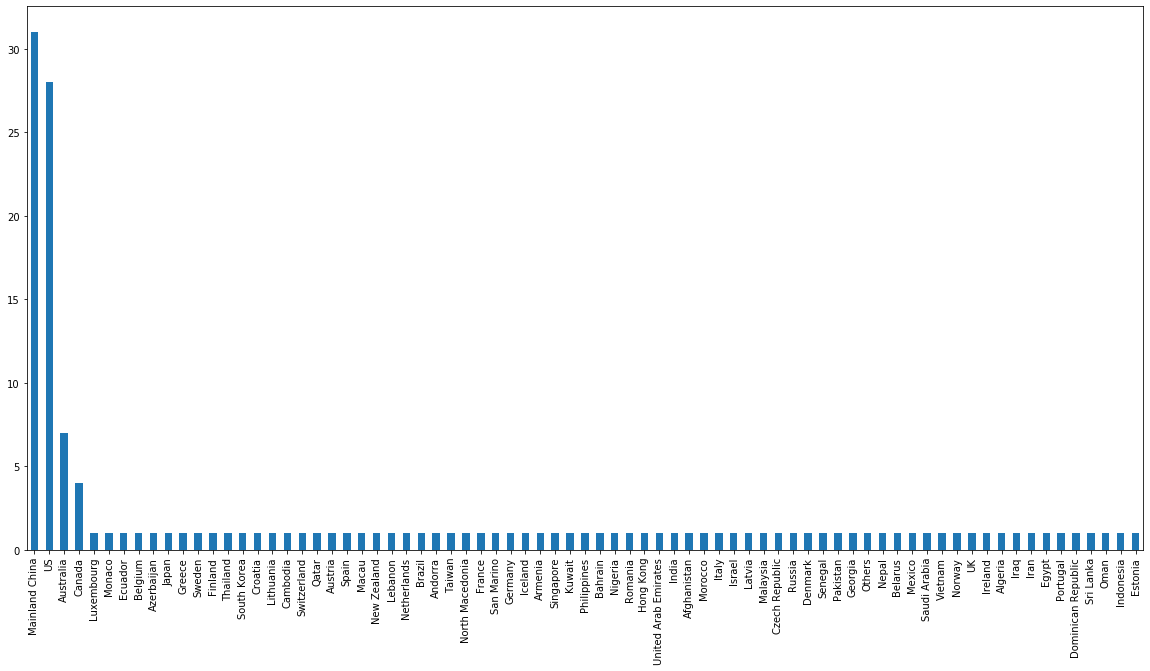

In [0]:
data['Country/Region'].value_counts().plot(kind='bar',figsize=(20,10))

In [0]:
data['Country/Region'].unique()

array(['Mainland China', 'South Korea', 'Italy', 'Iran', 'Others',
       'Japan', 'France', 'Germany', 'Spain', 'Singapore', 'Hong Kong',
       'Kuwait', 'Bahrain', 'US', 'Thailand', 'Switzerland', 'Taiwan',
       'UK', 'Malaysia', 'Iraq', 'Norway', 'United Arab Emirates',
       'Austria', 'Netherlands', 'Canada', 'Vietnam', 'Sweden', 'Lebanon',
       'Israel', 'Macau', 'Australia', 'Belgium', 'San Marino', 'Croatia',
       'Greece', 'Ecuador', 'Finland', 'Iceland', 'Oman', 'India',
       'Mexico', 'Denmark', 'Pakistan', 'Algeria', 'Azerbaijan',
       'Czech Republic', 'Georgia', 'Philippines', 'Qatar', 'Romania',
       'Russia', 'Brazil', 'Egypt', 'Indonesia', 'Portugal',
       'Afghanistan', 'Andorra', 'Armenia', 'Belarus', 'Cambodia',
       'Dominican Republic', 'Estonia', 'Ireland', 'Latvia', 'Lithuania',
       'Luxembourg', 'Monaco', 'Morocco', 'Nepal', 'New Zealand',
       'Nigeria', 'North Macedonia', 'Saudi Arabia', 'Senegal',
       'Sri Lanka'], dtype=object)

In [0]:
len(data['Country/Region'].unique())

75

In [0]:
import datetime as dt

In [0]:
data.dtypes

Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
Latitude          float64
Longitude         float64
dtype: object

In [0]:
import datetime

In [0]:
data['Last Update']=pd.to_datetime(data['Last Update'],format="%Y-%m-%dT%H:%M")


In [0]:
data=data.fillna(0)

In [0]:
data.isnull().sum()

Province/State    0
Country/Region    0
Last Update       0
Confirmed         0
Deaths            0
Recovered         0
Latitude          0
Longitude         0
dtype: int64

In [0]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-02T15:03:23,67103,2803,33934,30.9756,112.2707
1,0,South Korea,2020-03-02T20:23:16,4335,28,30,36.0000,128.0000
2,0,Italy,2020-03-02T20:23:16,2036,52,149,43.0000,12.0000
3,0,Iran,2020-03-02T20:23:16,1501,66,291,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-02T15:03:23,1350,7,1059,23.3417,113.4244
